# Assignment 4: Simulating Income
### Mengchen Shi
#### mshi17@uchicago.edu

## Part1. Kaggle open call projects

#### Question 1
mengchenshi
shimengchen2017@outlook.com 

#### Question 2

The competition that I am interested in is Cdiscount’s Image Classification Challenge. It helps Cdiscount, France’s largest non-food e-commerce company, to categorize e-commerce photos. The goal of the competition is to build a model that automatically classifies the products based on their images.

To make a submission, we should first download the dataset provided, namely, information about products, their images and their categories. Then we need to load BSON files to read image data and convert to data frame, which is the key in data processing. After that, we need to combine images and categories in training data. 

For every product id in the test set, we should predict the correct category_id. This competition is evaluated on the categorization accuracy of our predictions (the percentage of products we get correct). 

For each id in the test set, we must predict a category_id. The file should contain a header and have the following format:

_id, category_id
2,   1000000055
5,   1000016018
6,   1000016055
etc.



#### Question 3

I explored the US Baby Names dataset. I used SQL queries to find out the most popular male names in each decade; and then plot the trends along the time by using Python matplotlib.

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sq3
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('./data/NationalNames.csv') # Load data
connect = sq3.connect('./data/database.sqlite')

In [25]:
male_names_year = pd.read_sql_query("""
WITH name_year AS (
SELECT 
CASE WHEN year like '188%' THEN '1880s'
     WHEN year like '189%' THEN '1890s'
     WHEN year like '190%' THEN '1900s'
     WHEN year like '191%' THEN '1910s'
     WHEN year like '192%' THEN '1920s'
     WHEN year like '193%' THEN '1930s'
     WHEN year like '194%' THEN '1940s'
     WHEN year like '195%' THEN '1950s'
     WHEN year like '196%' THEN '1960s'
     WHEN year like '197%' THEN '1970s'
     WHEN year like '198%' THEN '1980s'
     WHEN year like '199%' THEN '1990s'
     WHEN year like '200%' THEN '2000s'
     WHEN year like '201%' THEN '2010s'
END AS year,
Name, SUM(Count) AS Total_Count
FROM NationalNames
WHERE Gender = 'M'
GROUP BY year, Name)
SELECT year, Name, MAX(Total_Count) AS Count_of_Name
FROM name_year
GROUP BY year""", connect)
male_names_year

,year,Name,Count_of_Name
0,1880s,John,9655
1,1890s,John,9039
2,1900s,John,9829
3,1910s,John,56559
4,1920s,Robert,61664
5,1930s,Robert,62262
6,1940s,James,94755
7,1950s,Michael,92709
8,1960s,Michael,86916
9,1970s,Michael,85321


The names in the table are the most popular male names in each dacade.

Now let's look at the trend for each name along the time: John, Robert, James, Michael, and Jacob.

In [13]:
popular_names_year = pd.read_sql_query("""
SELECT year, Name, Count
FROM NationalNames
WHERE Gender = 'M' AND Name IN ('John','Robert','James','Michael','Jacob')
""", connect)

Text(0.5,1,'Male Name Popularity trends (1880 ~ 2014)')

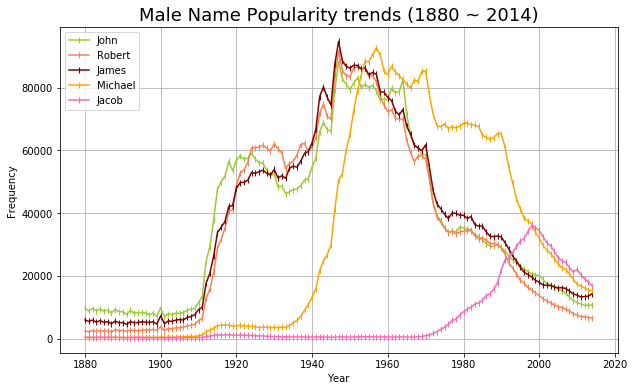

In [23]:
%matplotlib inline
lines = plt.figure(figsize=(10,6))
ax = lines.add_subplot(1,1,1)
popular_names_year[popular_names_year['Name']=='John'].plot(x='Year', y='Count',color = 'yellowgreen',ax=ax,label='John', marker= '|' )
popular_names_year[popular_names_year['Name']=='Robert'].plot(x='Year', y='Count',color = 'coral',ax=ax,label='Robert', marker= '|' )
popular_names_year[popular_names_year['Name']=='James'].plot(x='Year', y='Count',color = 'maroon',ax=ax,label='James', marker= '|' )
popular_names_year[popular_names_year['Name']=='Michael'].plot(x='Year', y='Count', color ='orange',ax=ax,label = 'Michael', marker= '|' )
popular_names_year[popular_names_year['Name']=='Jacob'].plot(x='Year', y='Count',color = 'hotpink',ax=ax,label='Jacob', marker= '|' )
plt.grid(True)
plt.ylabel(r'Frequency')
plt.legend(loc='upper left')
plt.title('Male Name Popularity trends (1880 ~ 2014)', fontsize=18)

It seems there are most James', and then Robert's and John's. James, Robert and John are almost equally popular in 1920s, 30s, 40s and 50s, and they share the same trend. Their popularity is replaced by Michael after 1950s, and Michael is the most popular male name from 1950s to mid 1990s. After that, Jacob became the most welcome baby name.

## Part2. Improving a journal article

In the “From Returns to Tweets and Back: An Investigation of the Stocks in the Dow Jones Industrial Average”, published in the Journal of Behavioral Finance, Pieter de Jong et al.(2017) analyzed 150,180 minute-by-minute stock price and tweet data for the 30 stocks in the Dow Jones Industrial Average over a random 13-day interval from June 2 to June 18, 2014 and found that a bidirectional intraday relationship between stock returns and volatility and tweets exists.

While they investigated the relationship between the number of times the stocks were mentioned on Twitter and the volatility of these stocks, their research can be enhanced by analyzing the content of the tweets instead of the number only. 

Specifically, the author can first make a rule to define the tone of a tweet. Namely, whether a tweet delivers positive, negative or neutral information about a stock. While it is not easy for a computer to decide the tone indicated by a twitter, it is a basic ability owned by an educated person. To attract more participants to help to read and categorize tweets, we can collaborate with websites that attract active investors. Take the Wall Street Journal for example, we can provide the readers with some free articles or a discount to subscribe the journal if they agree to do a task: to figure out the tone of tweets. It is would not take the readers much time so they are likely to participate. Some might worry about the quality of participants’ work since they might do not treat the task seriously and give answers randomly. To control the quality of their’ work, we can include both tweets that have been well categorized and those need to be analyzed in one task, and we offer rewards to the participant only if he/she correctly categorizes most of the tweets that have been categorized. Furthermore, we can enhance the quality by redundancy; that is, having the same task repeatedly performed by many different participants. Moreover, by detecting the best classifiers and giving more weight to them rather than give each participant equal weight, we can improve the develop the research more convincing.

In this way, we can obtain a great amount of data efficiently. In addition, we can make the project to be a second-generation human computational project by implementing machine learning skills; that is, with the dataset built by human beings, we can train a computer to handle essentially infinite amounts of tweets.

By formulating the data collection as a human computation project, researchers can increase the number of observations dramatically and extend the observation period to make their conclusion more convincing. Most importantly, the research will be enriched by not only counting the number of tweets but also analyzing the implication behind the words. 

#### Reference:
Jong, Pieter De, S. Elfayoumy, and O. Schnusenberg. "From Returns to Tweets and Back: An Investigation of the Stocks in the Dow Jones Industrial Average." Journal of Behavioral Finance 18.1(2017):54-64.


## Part 3. 

I am not eligible to register an MTurk account so I did work on alternative websites instead since as Benjamin said:

> I am not familiar with other micro-task job market sites similar to Amazon MTurk, so I cannot assign you to work on a different site. If you are aware of one that you can legally participate on, feel free to use that site instead of MTurk - again, completing an hour's worth of micro-task assignments.

I found several similar websites, but there are very few projects are feasible and user-friendly. So I selected two websites and did some work separately on them.


The first one is <https://www.clickworker.com>.
My account is shown below:
![Pic1](./chart/clickworker_account2.jpeg)



The projects I have done on clickworker are shown below:
![Pic2](./chart/clickworker_work.jpeg)


The second website is <https://www.zooniverse.org/>.
My account is shown below:
![Pic3](./chart/zooniverse_account.jpeg)



I did a task called Snow spotter. It requires users to look at some pictures and tell if there is snow on trees in the picture. I completed 169 classification for this projects.
![Pic2](./chart/Snow on trees.jpeg)